In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 42kB/s 


In [ ]:
!nvidia-smi

Sun Apr 11 22:19:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os 
import sys

In [6]:
dataset=('/content/drive/MyDrive/covid19_radiography_dataset')

In [7]:
dataset

'/content/drive/MyDrive/covid19_radiography_dataset'

In [8]:
import os 
import sys
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path =("/content/drive/MyDrive/covid19_radiography_dataset/train/")
valid_path =("/content/drive/MyDrive/covid19_radiography_dataset/test/")

In [9]:
train_path

'/content/drive/MyDrive/covid19_radiography_dataset/train/'

In [10]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [11]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [12]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/covid19_radiography_dataset/train/*')

In [13]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covid19_radiography_dataset/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode = 'categorical')

Found 21175 images belonging to 4 classes.


In [19]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/covid19_radiography_dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7128 images belonging to 4 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
662/662 [==============================] - 7767s 12s/step - loss: 2.5250 - accuracy: 0.7117 - val_loss: 1.9505 - val_accuracy: 0.7848
Epoch 2/10
662/662 [==============================] - 301s 454ms/step - loss: 2.0563 - accuracy: 0.7854 - val_loss: 0.9965 - val_accuracy: 0.8667
Epoch 3/10
662/662 [==============================] - 299s 452ms/step - loss: 1.9620 - accuracy: 0.8068 - val_loss: 1.5864 - val_accuracy: 0.8324
Epoch 4/10
662/662 [==============================] - 299s 452ms/step - loss: 1.9727 - accuracy: 0.8145 - val_loss: 1.2255 - val_accuracy: 0.8569
Epoch 5/10
662/662 [==============================] - 300s 453ms/step - loss: 2.2233 - accuracy: 0.8159 - val_loss: 2.2928 - val_accuracy: 0.7997
Epoch 6/10
662/662 [==============================] - 299s 451ms/step - loss: 2.0369 - accuracy: 0.8237 - val_loss: 8.0622 - val_accuracy: 0.5448
Epoch 7/10
662/662 [==============================] - 300s 454ms/step - loss: 2.2845 - accuracy: 0.8247 - val_loss: 2.1083 - 

In [23]:
import matplotlib.pyplot as plt

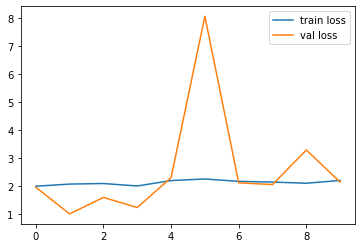

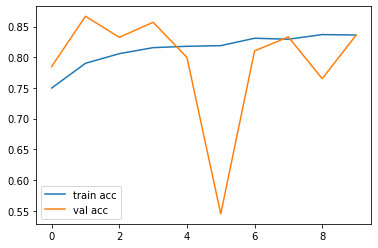

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:

# save it as a h5 file

from tensorflow.keras.models import load_model
model.save("/content/drive/MyDrive/covid19_radiography_dataset", save_format="model_inception.h5")
model.save('model_inception.h5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/covid19_radiography_dataset/assets
